In [1]:
# E-commerce Sales Dashboard - Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("ecommerce_sales_data.csv")
df.head()


,OrderID,CustomerID,Product,Category,OrderDate,Region,Quantity,UnitPrice,Revenue,PaymentMethod
0,ORD0001,CUST1071,Perfume,Beauty,28-09-2023,North,3,400.31,1200.93,Debit Card
1,ORD0002,CUST1082,Headphones,Electronics,02-05-2023,North,1,302.46,302.46,PayPal
2,ORD0003,CUST1099,Sofa,Home,29-03-2023,South,3,38.46,115.38,Credit Card
3,ORD0004,CUST1001,Comics,Books,05-11-2023,South,4,356.96,1427.84,Cash on Delivery
4,ORD0005,CUST1063,Comics,Books,21-01-2024,North,4,417.90,1671.60,Credit Card


In [2]:
##DATA CLEANING

# Check for null values
print("Null values in each column:\n", df.isnull().sum())

# Remove duplicates if any
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Null values in each column:
 OrderID          0
CustomerID       0
Product          0
Category         0
OrderDate        0
Region           0
Quantity         0
UnitPrice        0
Revenue          0
PaymentMethod    0
dtype: int64
Shape after removing duplicates: (500, 10)


In [18]:
##Key Performance Indicators (KPIs)

total_revenue = df['Revenue'].sum()
total_orders = df['OrderID'].nunique()
average_order_value = df['Revenue'].mean()

print("Total Revenue: ₹", round(total_revenue, 2))
print("Total Orders:", total_orders)
print("Average Order Value (AOV): ₹", round(average_order_value, 2))


Total Revenue: ₹ 334568.97
Total Orders: 500
Average Order Value (AOV): ₹ 669.14


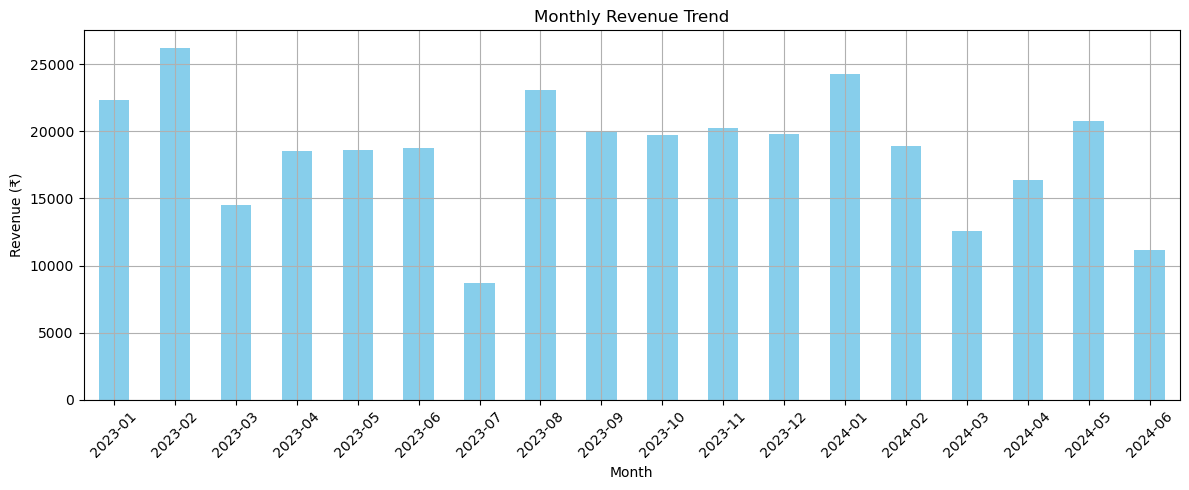

In [23]:
##Monthly Revenue Trend

df['OrderDate'] = pd.to_datetime(df['OrderDate'])
monthly_sales = df.groupby(df['OrderDate'].dt.to_period('M'))['Revenue'].sum()

monthly_sales.plot(kind='bar', figsize=(12,5), title="Monthly Revenue Trend", color='skyblue')
plt.ylabel("Revenue (₹)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('monthyrevenue.png' , dpi =300, bbox_inches='tight')
plt.show()


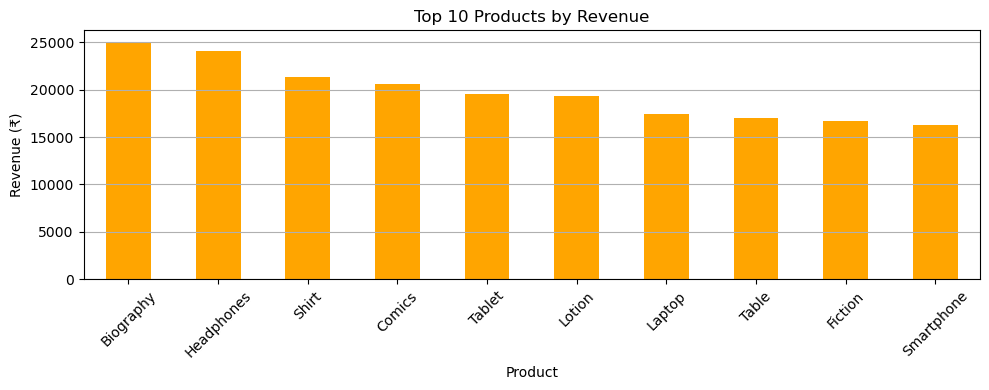

In [24]:
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar', figsize=(10,4), title="Top 10 Products by Revenue", color='orange')
plt.ylabel("Revenue (₹)")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('topproduct.png' , dpi =300, bbox_inches='tight')
plt.show()


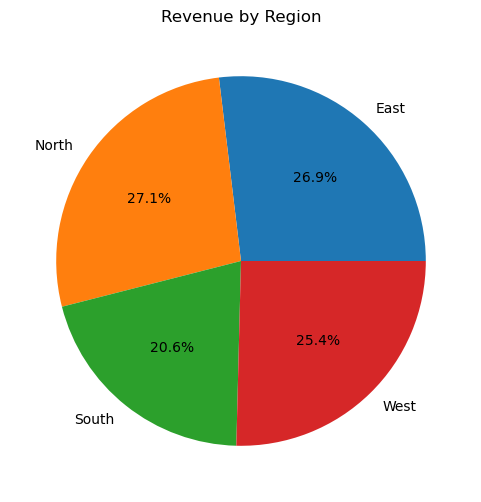

In [25]:
##Revenue by Region
region_sales = df.groupby('Region')['Revenue'].sum()

region_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title="Revenue by Region")
plt.ylabel("")
plt.savefig('RevenuebyRegion.png' , dpi =300, bbox_inches='tight')
plt.show()


C:\Users\Smti\AppData\Local\Temp\ipykernel_3312\1951540470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PaymentMethod', palette='Set2')


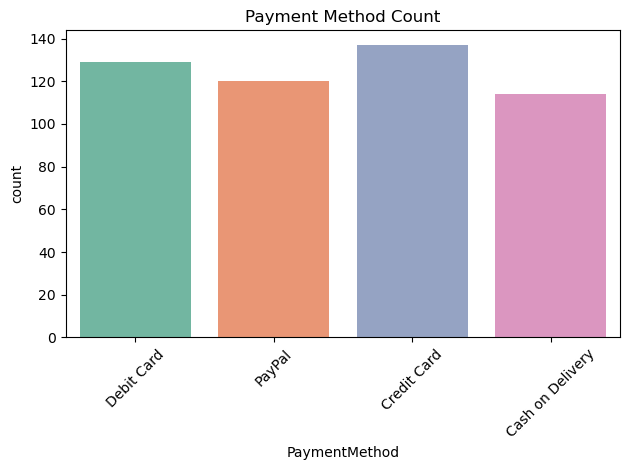

In [26]:
##Payment Method Distribution

sns.countplot(data=df, x='PaymentMethod', palette='Set2')
plt.title("Payment Method Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Payment method.png' , dpi =300, bbox_inches='tight')
plt.show()


In [8]:
df.to_csv("cleaned_ecommerce_data.csv", index=False)

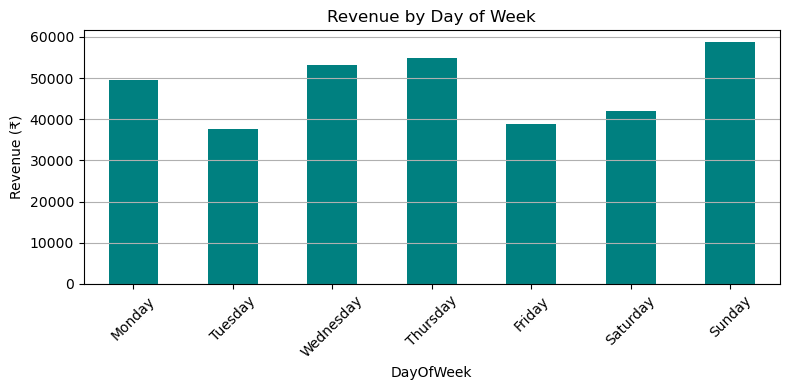

In [27]:
##Revenue day of week

df['DayOfWeek'] = df['OrderDate'].dt.day_name()
dow_sales = df.groupby('DayOfWeek')['Revenue'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

dow_sales.plot(kind='bar', title='Revenue by Day of Week', figsize=(8,4), color='teal')
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('revenuedayofweek.png' , dpi =300, bbox_inches='tight')
plt.show()


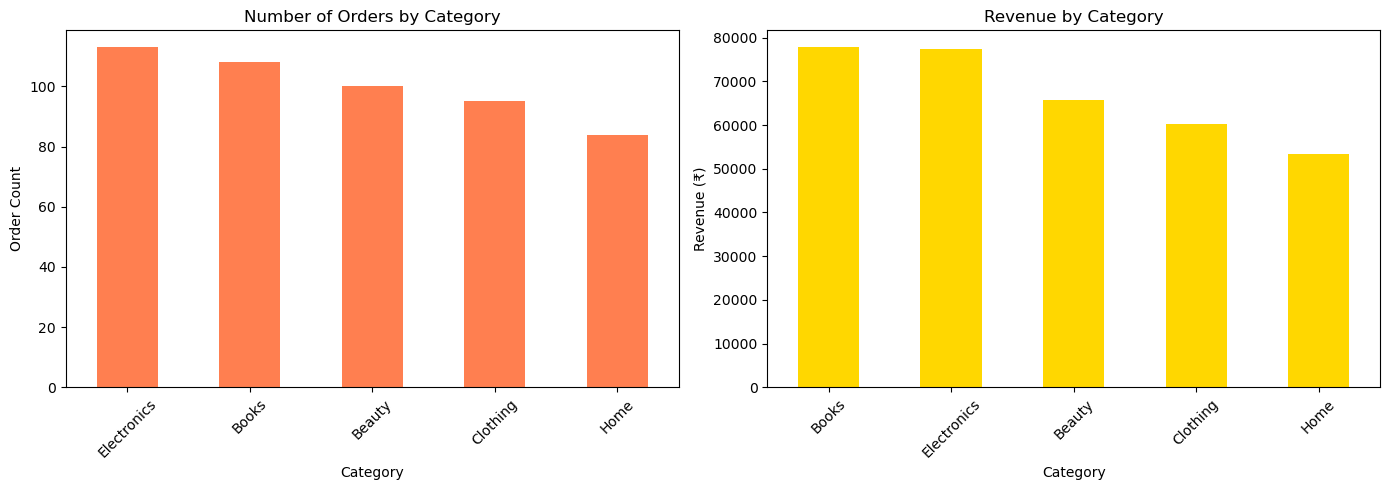

In [28]:
#Category-Wise Sales Count and Revenue

# Count of orders per category
category_counts = df['Category'].value_counts()

# Total revenue per category
category_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

# Plot both side-by-side
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

category_counts.plot(kind='bar', ax=ax[0], title='Number of Orders by Category', color='coral')
ax[0].set_ylabel('Order Count')
ax[0].tick_params(axis='x', rotation=45)

category_revenue.plot(kind='bar', ax=ax[1], title='Revenue by Category', color='gold')
ax[1].set_ylabel('Revenue (₹)')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('countandtotal.png' , dpi =300, bbox_inches='tight')
plt.show()


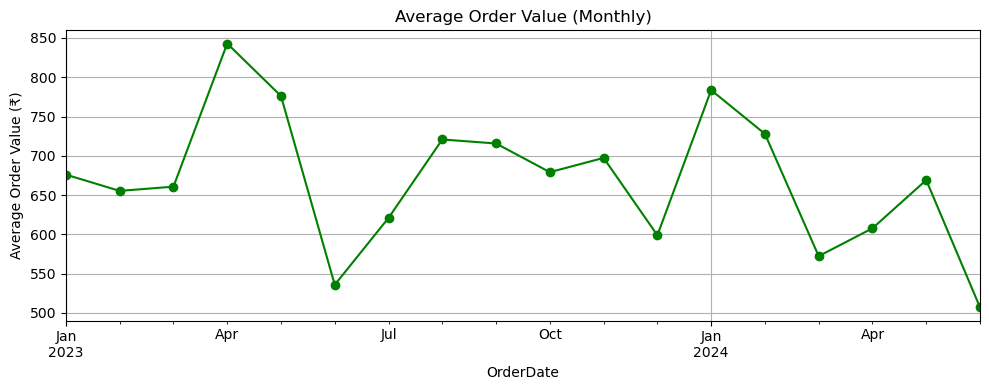

In [30]:
#average order monthly

aov_trend = df.groupby(df['OrderDate'].dt.to_period('M')).apply(
    lambda x: x['Revenue'].sum() / x['OrderID'].nunique()
)

aov_trend.plot(figsize=(10,4), title="Average Order Value (Monthly)", marker='o', color='green')
plt.ylabel("Average Order Value (₹)")
plt.grid(True)
plt.tight_layout()
plt.savefig('averageordermonth.png' , dpi =300, bbox_inches='tight')
plt.show()


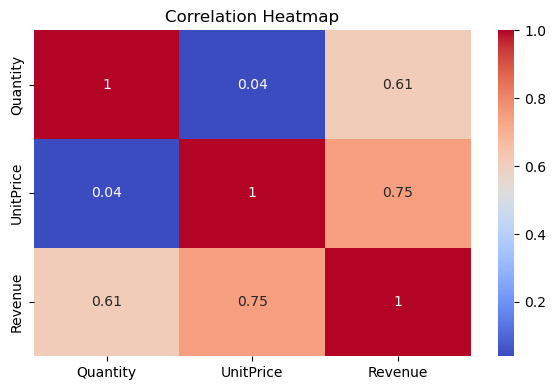

In [32]:
#Correlation Heatmap

corr= df[['Quantity', 'UnitPrice', 'Revenue']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig('correlation.png' , dpi =300, bbox_inches='tight')
plt.show()


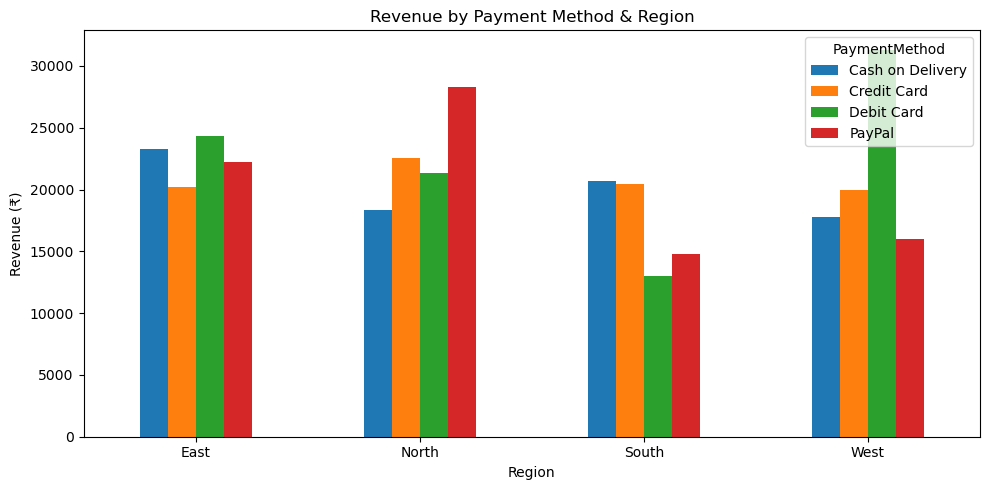

In [33]:
#Revenue by Payment Method & Region

pivot = df.pivot_table(index='Region', columns='PaymentMethod', values='Revenue', aggfunc='sum')

pivot.plot(kind='bar', figsize=(10,5), title='Revenue by Payment Method & Region')
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('revenuebypayment.png' , dpi =300, bbox_inches='tight')
plt.show()


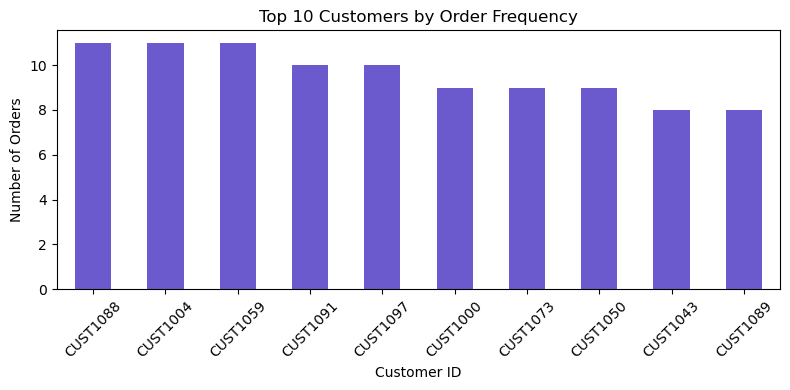

In [34]:
#Top 10 Customers by Order Frequency


top_customers = df['CustomerID'].value_counts().head(10)

top_customers.plot(kind='bar', figsize=(8,4), title='Top 10 Customers by Order Frequency', color='slateblue')
plt.ylabel("Number of Orders")
plt.xlabel("Customer ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top10customer.png' , dpi =300, bbox_inches='tight')
plt.show()
